<a href="https://colab.research.google.com/github/wallynovak/phosphatase/blob/main/Acid_Phosphatase_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acid Phosphatase data analysis Python code

In our first experiment, we tested five compounds for their ability to inhibit acid phosphatase. You will need to enter your absorbance reading at 405 nm and your pathlength data in the code cell below (abs405). The second column is your absorbance data, the third column is the pathlength.

Then, run the code cell below by clicking the "play button." The next code cell will determine the activity in units (U) per minute. One unit of phosphatase activity is defined as the amount of enzyme that breaks down 1 nmol or pNPP in 1 minute.

In [ ]:
# Enter the absorbance at 405 nm
# and the path length for each of your wells
# Row, abs405, pathlength in cm

abs405 = [("A", 0.1, 0.34),
          ("B", 0.569, 0.34),
          ("C", 0.550, 0.34),
          ("D", 0.263, 0.34),
          ("E", 0.121, 0.34),
          ("F", 0.572, 0.34),
          ("G", 0.486, 0.34)]

assaytime = 5 # set the assay time in minutes
molextinction = 18000 # in M-1 cm-1
activity = []
rows = "ABCDEFGH"


n=0
for item in abs405:
  act = item[1] * 300E-6 * 1E9 / (molextinction * item[2] * assaytime)
  rounded = round(act, 2)
  data1 = (rows[n], rounded)
  activity.append(data1)
  n = n+1
  print(f"Row: {item[0]} \t Activity: {rounded} U/min")


Row: A 	 Activity: 0.98 U/min
Row: B 	 Activity: 5.58 U/min
Row: C 	 Activity: 5.39 U/min
Row: D 	 Activity: 2.58 U/min
Row: E 	 Activity: 1.19 U/min
Row: F 	 Activity: 5.61 U/min
Row: G 	 Activity: 4.76 U/min


# Do any of your compounds inhibit acid phosphatase?

Run the code cell below to generate a bar graph of your data. Do any of your compounds inhibit? Share your results with the class.

<BarContainer object of 7 artists>

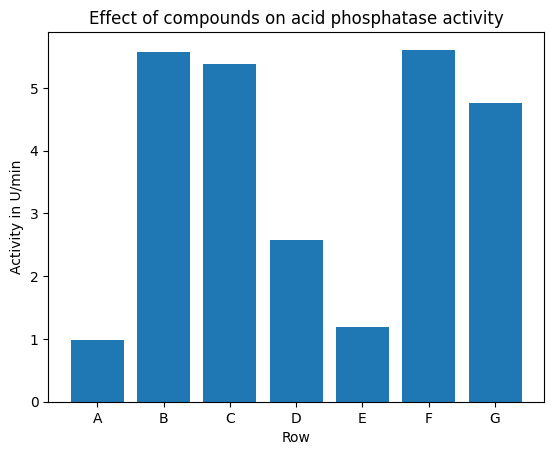

In [ ]:
#print(activity)

import matplotlib.pyplot as plt

categories = [item[0] for item in activity]
values = [item[1] for item in activity]
plt.xlabel('Row')
plt.ylabel('Activity in U/min')
plt.title('Effect of compounds on acid phosphatase activity')

plt.bar(categories, values)



---



# Determination of Kinetic Parameters Km and Vmax

In your second experiment you will vary the concentration of substrate and assess the activity of your enzyme at each substrate concentration.

Once complete, edit the abs405 data below to match your output from the plate reader. The second column is your absorbance data, the third column is the pathlength.

Next run the cell below to calculate your activity for each substrate concentration.

In [ ]:
# Enter the absorbance at 405 nm
# and the path length for each of your wells in the first column

assaytime = 5 # set the assay time in minutes
molextinction = 18000 # in M-1 cm-1
activity2 = []
rows = "ABCDEFGH"

# Edit columns 2 and 3 below
# Row, abs405 in mAU, pathlength in cm, conc pNPP
abs405 = [("A", 0.0, 0.34, 0),
          ("B", 0.13, 0.34, 50),
          ("C", 0.18, 0.34, 100),
          ("D", 0.25, 0.34, 200),
          ("E", 0.29, 0.34, 400),
          ("F", 0.30, 0.34, 600)]
n=0
for item in abs405:
  act = item[1] * 300E-6 * 1E9 / (18000 * item[2] * 5)
  rounded = round(act, 2)
  data1 = (item[3], rounded)
  activity2.append(data1)
  n = n+1
  print(f"pNPP Conc.: {item[3]} uM \t Activity: {rounded} U/min")

#print(activity)

pNPP Conc.: 0 uM 	 Activity: 0.0 U/min
pNPP Conc.: 50 uM 	 Activity: 1.27 U/min
pNPP Conc.: 100 uM 	 Activity: 1.76 U/min
pNPP Conc.: 200 uM 	 Activity: 2.45 U/min
pNPP Conc.: 400 uM 	 Activity: 2.84 U/min
pNPP Conc.: 600 uM 	 Activity: 2.94 U/min


# Visualize your results with a Michaelis-Menten plot

Simply run the code below to plot your data. You should see it start to flatten out at higher substrate concentrations. You can estimate Vmax here.

Once you have estimated Vmax, find the point on the Y-axis at 1/2\*Vmax. Then estimate where a horizontal line drawn from 1/2\*Vmax would hit your curve and then drop down vertically and read the corresponding substrate concentration. This is your estimate of Km.

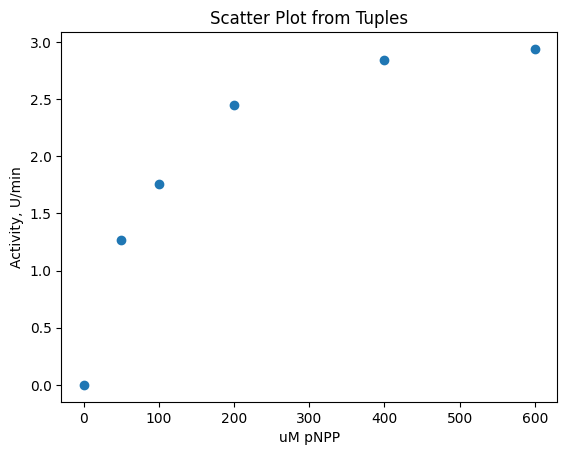

In [ ]:
x_coords, y_coords = zip(*activity2)
plt.xlabel("uM pNPP")
plt.ylabel("Activity, U/min")
plt.title("Scatter Plot from Tuples")
plt.scatter(x_coords, y_coords)


# Using math to accurately determine Km and Vmax

Before running this code, replace:
vmax_init = 3.0
km_init = 100.0
with your estimates of Km and Vmax.

Then run the cell.

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Initial guess for Vmax and Km
# These values can be estimated from your data or prior knowledge
# Example: Vmax ~ max(V_data), Km ~ [S] at 1/2*Vmax
vmax_init = 3.0
km_init = 100.0

def michaelis_menten(S, Vmax, Km):
  """
  Michaelis-Menten equation.
  S: Substrate concentration
  Vmax: Maximum reaction rate
  Km: Michaelis constant
  """
  return (Vmax * S) / (Km + S)

S_data2 = np.array([d[0] for d in activity2])
V_data2 = np.array([d[1] for d in activity2])

initial_guess = [vmax_init, km_init]

# Perform the curve fitting
params, covariance = curve_fit(michaelis_menten, S_data2, V_data2, p0=initial_guess)

# Extract the fitted parameters
Vmax_fit2, Km_fit2 = params
print("Results for no inhibitor\n")
print(f"Fitted Vmax: {Vmax_fit2:.4f} U/min")
print(f"Fitted Km: {Km_fit2:.4f} uM")



Results for no inhibitor

Fitted Vmax: 3.4167 U/min
Fitted Km: 86.5683 uM


How close was your estimate to the true value?

# Visualizing the curve fit

Simply run the cell below to visualize the curve fit of your data!

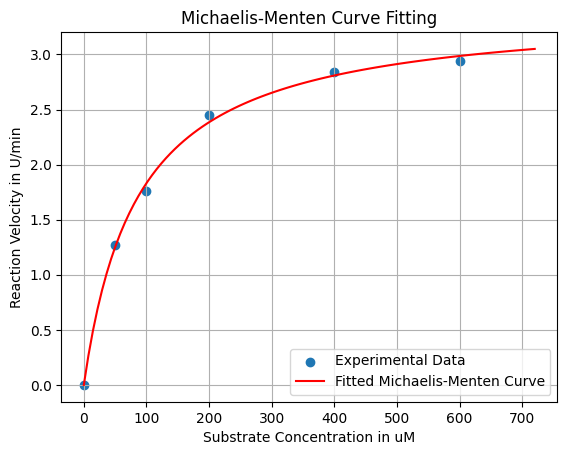

In [ ]:
import matplotlib.pyplot as plt

# Generate points for the fitted curve
S_fit2 = np.linspace(min(S_data2), max(S_data2) * 1.2, 100)
V_fit2 = michaelis_menten(S_fit2, Vmax_fit2, Km_fit2)

plt.scatter(S_data2, V_data2, label='Experimental Data')
plt.plot(S_fit2, V_fit2, color='red', label='Fitted Michaelis-Menten Curve')
plt.xlabel('Substrate Concentration in uM')
plt.ylabel('Reaction Velocity in U/min')
plt.title('Michaelis-Menten Curve Fitting')
plt.legend()
plt.grid(True)
plt.show()



---



# Determination of Kinetic Parameters with 10 uL inhibitor

In your second experiment you will vary the concentration of substrate and assess the activity of your enzyme at each substrate concentration.

Once complete, edit the abs405 data below to match your output from the plate reader. The second column is your absorbance data, the third column is the pathlength.

Next run the cell below to calculate your activity for each substrate concentration.

In [ ]:
# Enter the absorbance at 405 nm
# and the path length for each of your wells in the first column

assaytime = 5 # set the assay time in minutes
molextinction = 18000 # in M-1 cm-1
activity3 = []
rows = "ABCDEFGH"

# Row, abs405 in mAU, pathlength in cm, conc pNPP

abs405 = [("A", 0.0, 0.34, 0),
          ("B", 0.08, 0.34, 50),
          ("C", 0.12, 0.34, 100),
          ("D", 0.15, 0.34, 200),
          ("E", 0.19, 0.34, 400),
          ("F", 0.20, 0.34, 600)]
n=0
for item in abs405:
  act = item[1] * 300E-6 * 1E9 / (18000 * item[2] * 5)
  rounded = round(act, 2)
  data1 = (item[3], rounded)
  activity3.append(data1)
  n = n+1
  print(f"pNPP Conc.: {item[3]} uM \t Activity: {rounded} U/min")

#print(activity)

pNPP Conc.: 0 uM 	 Activity: 0.0 U/min
pNPP Conc.: 50 uM 	 Activity: 0.78 U/min
pNPP Conc.: 100 uM 	 Activity: 1.18 U/min
pNPP Conc.: 200 uM 	 Activity: 1.47 U/min
pNPP Conc.: 400 uM 	 Activity: 1.86 U/min
pNPP Conc.: 600 uM 	 Activity: 1.96 U/min


# Visualize your results with a Michaelis-Menten plot

Simply run the code below to plot your data. You should see it start to flatten out at higher substrate concentrations. You can estimate Vmax here.

Once you have estimated Vmax, find the point on the Y-axis at 1/2\*Vmax. Then estimate where a horizontal line drawn from 1/2\*Vmax would hit your curve and then drop down vertically and read the corresponding substrate concentration. This is your estimate of Km.

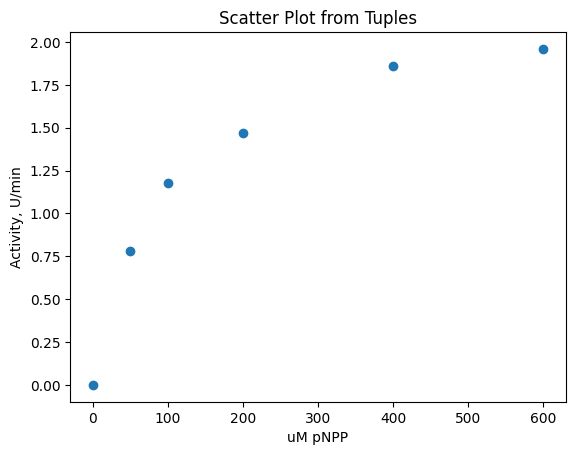

In [ ]:
x_coords, y_coords = zip(*activity3)
plt.xlabel("uM pNPP")
plt.ylabel("Activity, U/min")
plt.title("Scatter Plot from Tuples")
plt.scatter(x_coords, y_coords)


# Using math to accurately determine Km and Vmax

Before running this code replace:
vmax_init = 3.0
km_init = 100.0
with your estimates of Km and Vmax.

Then run the cell.

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Initial guess for Vmax and Km
# These values can be estimated from your data or prior knowledge
# Example: Vmax ~ max(V_data), Km ~ [S] at 1/2*Vmax
vmax_init = 3.0
km_init = 100.0

def michaelis_menten(S, Vmax, Km):
  """
  Michaelis-Menten equation.
  S: Substrate concentration
  Vmax: Maximum reaction rate
  Km: Michaelis constant
  """
  return (Vmax * S) / (Km + S)

S_data3 = np.array([d[0] for d in activity3])
V_data3 = np.array([d[1] for d in activity3])

initial_guess = [vmax_init, km_init]

# Perform the curve fitting
params, covariance = curve_fit(michaelis_menten, S_data3, V_data3, p0=initial_guess)

# Extract the fitted parameters
Vmax_fit3, Km_fit3 = params
print("Results for 10 uL inhibitor\n")
print(f"Fitted Vmax: {Vmax_fit3:.4f} U/min")
print(f"Fitted Km: {Km_fit3:.4f} uM")



Results for 10 uL inhibitor

Fitted Vmax: 2.2776 U/min
Fitted Km: 97.5869 uM


How close was your estimate to the true value?





---



# Determination of Kinetic Parameters with 20 uL inhibitor

In your second experiment you will vary the concentration of substrate and assess the activity of your enzyme at each substrate concentration.

Once complete, edit the abs405 data below to match your output from the plate reader. The second column is your absorbance data, the third column is the pathlength.

Next run the cell below to calculate your activity for each substrate concentration.

In [ ]:
# Enter the absorbance at 405 nm
# and the path length for each of your wells in the first column

assaytime = 5 # set the assay time in minutes
molextinction = 18000 # in M-1 cm-1
activity4 = []
rows = "ABCDEFGH"

# Row, abs405 in mAU, pathlength in cm, conc pNPP

abs405 = [("A", 0.0, 0.34, 0),
          ("B", 0.04, 0.34, 50),
          ("C", 0.07, 0.34, 100),
          ("D", 0.10, 0.34, 200),
          ("E", 0.13, 0.34, 400),
          ("F", 0.14, 0.34, 600)]
n=0
for item in abs405:
  act = item[1] * 300E-6 * 1E9 / (18000 * item[2] * 5)
  rounded = round(act, 2)
  data1 = (item[3], rounded)
  activity4.append(data1)
  n = n+1
  print(f"pNPP Conc.: {item[3]} uM \t Activity: {rounded} U/min")

#print(activity)

pNPP Conc.: 0 uM 	 Activity: 0.0 U/min
pNPP Conc.: 50 uM 	 Activity: 0.39 U/min
pNPP Conc.: 100 uM 	 Activity: 0.69 U/min
pNPP Conc.: 200 uM 	 Activity: 0.98 U/min
pNPP Conc.: 400 uM 	 Activity: 1.27 U/min
pNPP Conc.: 600 uM 	 Activity: 1.37 U/min


# Visualize your results with a Michaelis-Menten plot

Simply run the code below to plot your data. You should see it start to flatten out at higher substrate concentrations. You can estimate Vmax here.

Once you have estimated Vmax, find the point on the Y-axis at 1/2\*Vmax. Then estimate where a horizontal line drawn from 1/2\*Vmax would hit your curve and then drop down vertically and read the corresponding substrate concentration. This is your estimate of Km.

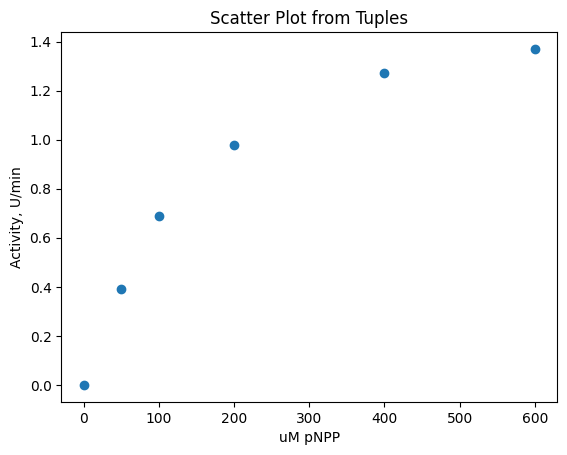

In [ ]:
x_coords, y_coords = zip(*activity4)
plt.xlabel("uM pNPP")
plt.ylabel("Activity, U/min")
plt.title("Scatter Plot from Tuples")
plt.scatter(x_coords, y_coords)


# Using math to accurately determine Km and Vmax

Before running this code replace:
vmax_init = 3.0
km_init = 100.0
with your estimates of Km and Vmax.

Then run the cell.

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Initial guess for Vmax and Km
# These values can be estimated from your data or prior knowledge
# Example: Vmax ~ max(V_data), Km ~ [S] at 1/2*Vmax
vmax_init = 3.0
km_init = 100.0

def michaelis_menten(S, Vmax, Km):
  """
  Michaelis-Menten equation.
  S: Substrate concentration
  Vmax: Maximum reaction rate
  Km: Michaelis constant
  """
  return (Vmax * S) / (Km + S)

S_data4 = np.array([d[0] for d in activity4])
V_data4 = np.array([d[1] for d in activity4])

initial_guess = [vmax_init, km_init]

# Perform the curve fitting
params, covariance = curve_fit(michaelis_menten, S_data4, V_data4, p0=initial_guess)

# Extract the fitted parameters
Vmax_fit4, Km_fit4 = params
print("Results for 20 uL inhibitor\n")
print(f"Fitted Vmax: {Vmax_fit4:.4f} U/min")
print(f"Fitted Km: {Km_fit4:.4f} uM")



Results for 20 uL inhibitor

Fitted Vmax: 1.7555 U/min
Fitted Km: 159.9025 uM




---



# Reporting your data

Make a table of your data to share with the class, include your Vmax and Km numbers for all three experiments.

Visualize all the curve fitted lines on the same graph. Just run the cell below to see your data!

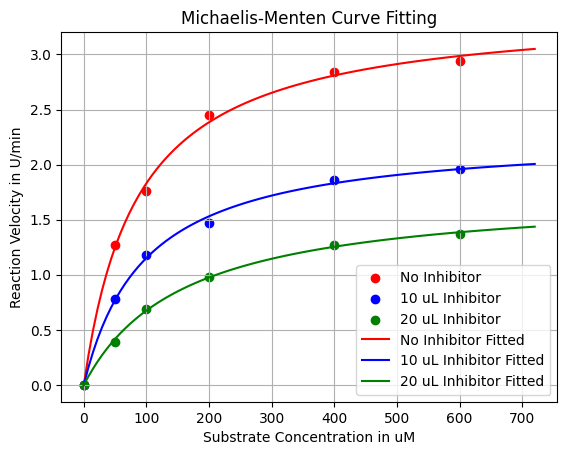

                           Results Table
				Vmax		 Km
Results for no inhibitor: 	3.4167 U/min	 86.5683 uM
Results for 10 uL inhibitor: 	2.2776 U/min	 97.5869 uM
Results for 20 uL inhibitor: 	1.7555 U/min	 159.9025 uM


In [ ]:
import matplotlib.pyplot as plt

# Generate points for the fitted curve
S_fit2 = np.linspace(min(S_data2), max(S_data2) * 1.2, 100)
V_fit2 = michaelis_menten(S_fit2, Vmax_fit2, Km_fit2)

S_fit3 = np.linspace(min(S_data3), max(S_data3) * 1.2, 100)
V_fit3 = michaelis_menten(S_fit3, Vmax_fit3, Km_fit3)

S_fit4 = np.linspace(min(S_data4), max(S_data4) * 1.2, 100)
V_fit4 = michaelis_menten(S_fit4, Vmax_fit4, Km_fit4)

plt.scatter(S_data2, V_data2, color='red', label='No Inhibitor')
plt.scatter(S_data3, V_data3, color='blue', label='10 uL Inhibitor')
plt.scatter(S_data4, V_data4, color='green', label='20 uL Inhibitor')
plt.plot(S_fit2, V_fit2, color='red', label='No Inhibitor Fitted')
plt.plot(S_fit3, V_fit3, color='blue', label='10 uL Inhibitor Fitted')
plt.plot(S_fit4, V_fit4, color='green', label='20 uL Inhibitor Fitted')
plt.xlabel('Substrate Concentration in uM')
plt.ylabel('Reaction Velocity in U/min')
plt.title('Michaelis-Menten Curve Fitting')
plt.legend()
plt.grid(True)
plt.show()

print("======================================================================")
print("                           Results Table")
print("======================================================================")
print("\t\t\t\tVmax\t\t Km")
print(f"Results for no inhibitor: \t{Vmax_fit2:.4f} U/min\t {Km_fit2:.4f} uM")
print(f"Results for 10 uL inhibitor: \t{Vmax_fit3:.4f} U/min\t {Km_fit3:.4f} uM")
print(f"Results for 20 uL inhibitor: \t{Vmax_fit4:.4f} U/min\t {Km_fit4:.4f} uM")



---



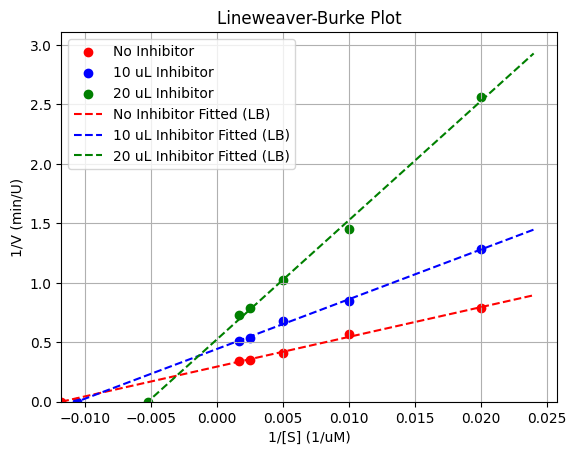


                       Lineweaver-Burke Results
				Vmax (LB)	 Km (LB)
Results for no inhibitor: 	3.3851 U/min	 84.6075 uM
Results for 10 uL inhibitor: 	2.2510 U/min	 94.0472 uM
Results for 20 uL inhibitor: 	1.9007 U/min	 190.2634 uM


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Prepare data for Lineweaver-Burke plot
# Convert activity and substrate concentration to their reciprocals

S_data2_reciprocal = 1 / S_data2[S_data2 != 0] # Avoid division by zero
V_data2_reciprocal = 1 / V_data2[S_data2 != 0]

S_data3_reciprocal = 1 / S_data3[S_data3 != 0]
V_data3_reciprocal = 1 / V_data3[S_data3 != 0]

S_data4_reciprocal = 1 / S_data4[S_data4 != 0]
V_data4_reciprocal = 1 / V_data4[S_data4 != 0]


# Define the Lineweaver-Burke linear model (y = mx + c)
# 1/V = (Km/Vmax) * (1/[S]) + 1/Vmax
def lineweaver_burke(reciprocal_S, Km_over_Vmax, one_over_Vmax):
  """
  Lineweaver-Burke linear equation.
  reciprocal_S: Reciprocal of substrate concentration (1/[S])
  Km_over_Vmax: Slope (Km/Vmax)
  one_over_Vmax: Y-intercept (1/Vmax)
  """
  return Km_over_Vmax * reciprocal_S + one_over_Vmax

# Perform linear fitting for each dataset
params2, covariance2 = curve_fit(lineweaver_burke, S_data2_reciprocal, V_data2_reciprocal)
slope2, y_intercept2 = params2

params3, covariance3 = curve_fit(lineweaver_burke, S_data3_reciprocal, V_data3_reciprocal)
slope3, y_intercept3 = params3

params4, covariance4 = curve_fit(lineweaver_burke, S_data4_reciprocal, V_data4_reciprocal)
slope4, y_intercept4 = params4

# Extract Lineweaver-Burke parameters
# 1/Vmax is the y-intercept, so Vmax = 1 / y_intercept
# Km/Vmax is the slope, so Km = slope * Vmax
Vmax_LB2 = 1 / y_intercept2
Km_LB2 = slope2 * Vmax_LB2
new_dp2 = -1/Km_LB2
#S_data2_reciprocal = np.append(S_data2_reciprocal, new_dp2)
#V_data2_reciprocal = np.append(V_data2_reciprocal, 0)

Vmax_LB3 = 1 / y_intercept3
Km_LB3 = slope3 * Vmax_LB3
new_dp3 = -1/Km_LB3
#S_data3_reciprocal = np.append(S_data3_reciprocal, new_dp3)
#V_data3_reciprocal = np.append(V_data3_reciprocal, 0)

Vmax_LB4 = 1 / y_intercept4
Km_LB4 = slope4 * Vmax_LB4
new_dp4 = -1/Km_LB4
#S_data4_reciprocal = np.append(S_data4_reciprocal, new_dp4)
#V_data4_reciprocal = np.append(V_data4_reciprocal, 0)

# Generate points for the fitted Lineweaver-Burke lines
reciprocal_S_fit = np.linspace(min(S_data2_reciprocal), max(S_data4_reciprocal) * 1.2, 100)
reciprocal_V_fit2 = lineweaver_burke(reciprocal_S_fit, slope2, y_intercept2)
reciprocal_V_fit3 = lineweaver_burke(reciprocal_S_fit, slope3, y_intercept3)
reciprocal_V_fit4 = lineweaver_burke(reciprocal_S_fit, slope4, y_intercept4)

# Create the Lineweaver-Burke plot
plt.figure() # Create a new figure for the Lineweaver-Burke plot
plt.scatter(S_data2_reciprocal, V_data2_reciprocal, color='red', label='No Inhibitor')
plt.scatter(S_data3_reciprocal, V_data3_reciprocal, color='blue', label='10 uL Inhibitor')
plt.scatter(S_data4_reciprocal, V_data4_reciprocal, color='green', label='20 uL Inhibitor')

plt.plot(reciprocal_S_fit, reciprocal_V_fit2, color='red', linestyle='--', label='No Inhibitor Fitted (LB)')
plt.plot(reciprocal_S_fit, reciprocal_V_fit3, color='blue', linestyle='--', label='10 uL Inhibitor Fitted (LB)')
plt.plot(reciprocal_S_fit, reciprocal_V_fit4, color='green', linestyle='--', label='20 uL Inhibitor Fitted (LB)')

plt.xlabel('1/[S] (1/uM)')
plt.ylabel('1/V (min/U)')
plt.title('Lineweaver-Burke Plot')
plt.legend()
plt.grid(True)
plt.ylim(ymin=0) # Ensure the y-axis starts from 0 or slightly below if negative values are possible in fitting
plt.xlim(xmin=new_dp2) # Ensure the x-axis starts from 0 or slightly below if negative values are possible in fitting

plt.show()

print("\n======================================================================")
print("                       Lineweaver-Burke Results")
print("======================================================================")
print("\t\t\t\tVmax (LB)\t Km (LB)")
print(f"Results for no inhibitor: \t{Vmax_LB2:.4f} U/min\t {Km_LB2:.4f} uM")
print(f"Results for 10 uL inhibitor: \t{Vmax_LB3:.4f} U/min\t {Km_LB3:.4f} uM")
print(f"Results for 20 uL inhibitor: \t{Vmax_LB4:.4f} U/min\t {Km_LB4:.4f} uM")


What type of inhibitor do you think you have? How do you know?